In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml # For downloading mnist 784 dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist = fetch_openml("mnist_784")

C:\Users\Aditya Mitra\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.data.shape

(70000, 784)

In [5]:
# Define function to see the number images from the Mnist dataset
# Let it take the dataframe and index number of the dataframe as arguements
def showimage(dframe, index):
    somedigit = dframe.to_numpy()[index]
    somedigitimage = somedigit.reshape(28, 28)
    
    plt.imshow(somedigitimage, cmap = "binary")
    plt.axis("off")
    plt.show()

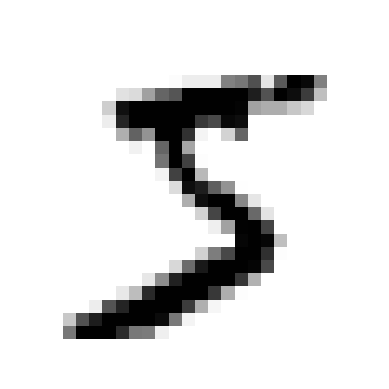

In [6]:
showimage(mnist.data, 0)

In [19]:
trainimg, testimg, trainlbl, testlbl = train_test_split(mnist.data, mnist.target, test_size = 1/7.0, random_state = 0)

In [20]:
type(trainimg)

pandas.core.frame.DataFrame

In [21]:
# Copying trainimg for checking results later
testimgcopy = testimg.copy()

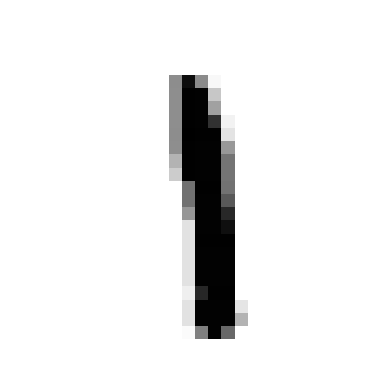

In [22]:
showimage(testimgcopy, 2)

In [23]:
scaler = StandardScaler()

# Scaler only needs to fit on the training set
scaler.fit(trainimg)

# Both training and test set need to be transformed
trainimg = scaler.transform(trainimg)
testimg = scaler.transform(testimg)

In [24]:
# Variance to be protected by 95%
# Make PCA model instance
pcamodel = PCA(.95)

In [25]:
pcamodel.fit(trainimg)

PCA(n_components=0.95)

In [26]:
print(pcamodel.n_components_)

327


In [27]:
trainimg = pcamodel.transform(trainimg)
testimg = pcamodel.transform(testimg)

In [28]:
# Choose lbfgs solver because it is faster than the standard solver
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter = 10000)

In [29]:
# Train model using train dataset
logisticRegr.fit(trainimg, trainlbl)

LogisticRegression(max_iter=10000)

In [30]:
logisticRegr.predict(testimg[0].reshape(1,-1))

array(['0'], dtype=object)

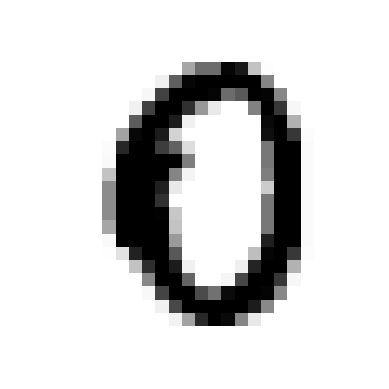

In [31]:
showimage(testimgcopy, 0)

In [32]:
logisticRegr.predict(testimg[1].reshape(1,-1))

array(['4'], dtype=object)

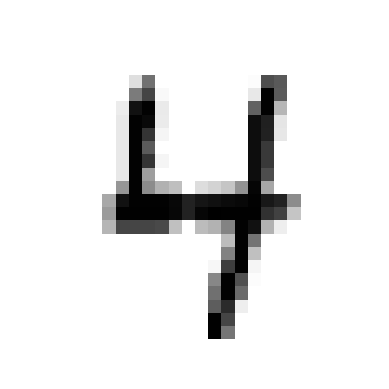

In [33]:
showimage(testimgcopy, 1)

In [34]:
# Measure model accuracy 
logisticRegr.score(testimg, testlbl)

0.9184